In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


In [69]:
data = load_breast_cancer()
print(data)
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target
X


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
dataset = X
dataset["target"] = y
dataset
 `10
dataset.shape



(569, 31)

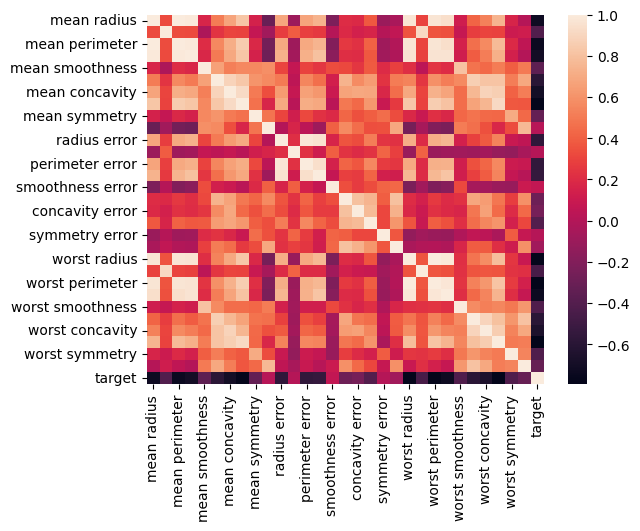

In [18]:
data_corr = dataset.corr() # annot = True
sns.heatmap(data_corr)
plt.show()

In [19]:
data_corr["target"]

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [ ]:
threshold = 0.7
corr_features = data_corr.index[abs(data_corr['target']) > threshold]
corr_features



Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [27]:
top_5 = abs(data_corr['target'].sort_values(ascending=False)).iloc[:5]
top_5

target                    1.000000
smoothness error          0.067016
mean fractal dimension    0.012838
texture error             0.008303
symmetry error            0.006522
Name: target, dtype: float64

In [29]:
worst_5 = top_5 = abs(data_corr['target'].sort_values()).iloc[:5]
worst_5

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
Name: target, dtype: float64

In [44]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.7)

X_selected = selector.fit_transform(dataset)
a = pd.DataFrame(X_selected)
a




,0,1,2,3,4,5,6,7,8,9
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.380,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.990,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.570,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,3.445,27.23,14.910,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,5.438,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,7.673,158.70,25.450,26.40,166.10,2027.0
565,20.13,28.25,131.20,1261.0,5.203,99.04,23.690,38.25,155.00,1731.0
566,16.60,28.08,108.30,858.1,3.425,48.55,18.980,34.12,126.70,1124.0
567,20.60,29.33,140.10,1265.0,5.772,86.22,25.740,39.42,184.60,1821.0


In [ ]:
# Get selected column names  top 5
selected_columns = dataset.columns[selector.get_support()].sort_values(ascending=False)[:5]
b = pd.DataFrame(selected_columns)
b

,0
0,worst texture
1,worst radius
2,worst perimeter
3,worst area
4,perimeter error


In [ ]:
# new_df = pd.DataFrame(X_selected, columns=selected_columns)
# new_df

,mean radius,mean texture,mean perimeter,mean area,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,target
0,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.380,17.33,184.60,2019.0,0.0
1,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.990,23.41,158.80,1956.0,0.0
2,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.570,25.53,152.50,1709.0,0.0
3,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.910,26.50,98.87,567.7,0.0
4,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.540,16.67,152.20,1575.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1.2560,7.673,158.70,25.450,26.40,166.10,2027.0,0.0
565,20.13,28.25,131.20,1261.0,2.4630,5.203,99.04,23.690,38.25,155.00,1731.0,0.0
566,16.60,28.08,108.30,858.1,1.0750,3.425,48.55,18.980,34.12,126.70,1124.0,0.0
567,20.60,29.33,140.10,1265.0,1.5950,5.772,86.22,25.740,39.42,184.60,1821.0,0.0


In [58]:
(dataset.describe().loc["std"]**2).sort_values(ascending = False)[:5]



worst area         324167.385102
mean area          123843.554318
area error           2069.431583
worst perimeter      1129.130847
mean perimeter        590.440480
Name: std, dtype: float64

In [ ]:
# selector = VarianceThreshold(threshold=590)
# selected_columns = dataset.columns[selector.get_support()].sort_values(ascending=False)[:5]

# X_selected = selector.fit_transform(dataset)
# X_filtered = pd.DataFrame(X_selected,columns=selected_columns)
# X_filtered

## mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
data = load_breast_cancer()
print(data)
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

mi_scores = mutual_info_classif(X,y, random_state=42)
# convert to a series
mi_series = pd.Series(mi_scores,index = X.columns)
mi_series = mi_series.sort_values(ascending=False)
mi_series

target                     0.661196
worst perimeter            0.478604
worst area                 0.463900
worst radius               0.450458
mean concave points        0.440121
worst concave points       0.437702
mean perimeter             0.401298
mean concavity             0.374546
mean radius                0.368646
mean area                  0.359027
area error                 0.341757
worst concavity            0.316098
perimeter error            0.274109
radius error               0.249391
worst compactness          0.224916
mean compactness           0.212279
concave points error       0.125069
worst texture              0.118822
concavity error            0.117722
worst smoothness           0.097463
mean texture               0.094988
worst symmetry             0.092286
mean smoothness            0.086621
compactness error          0.074135
mean symmetry              0.069919
worst fractal dimension    0.068600
fractal dimension error    0.039223
smoothness error           0

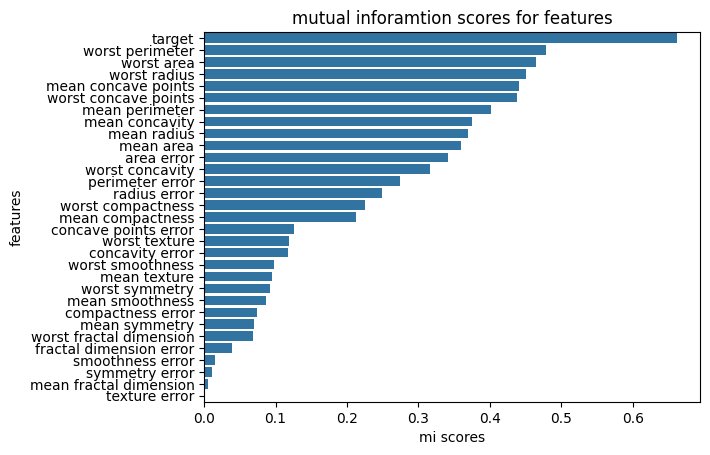

In [63]:
sns.barplot(x = mi_series,y = mi_series.index)
plt.title("mutual inforamtion scores for features")
plt.xlabel("mi scores")
plt.ylabel("features")
plt.show()

In [ ]:
# top k features
top_k = 10
selected_features = mi_series.head(top_k).index.to_list()
X_selected = X[selected_features]
print(X_selected.columns)

Index(['target', 'worst perimeter', 'worst area', 'worst radius',
       'mean concave points', 'worst concave points', 'mean perimeter',
       'mean concavity', 'mean radius', 'mean area'],
      dtype='object')


In [68]:
# threshold based filtering

threshold = 0.05
selected_features = mi_series[mi_series > threshold].index.tolist()
selected_features

['target',
 'worst perimeter',
 'worst area',
 'worst radius',
 'mean concave points',
 'worst concave points',
 'mean perimeter',
 'mean concavity',
 'mean radius',
 'mean area',
 'area error',
 'worst concavity',
 'perimeter error',
 'radius error',
 'worst compactness',
 'mean compactness',
 'concave points error',
 'worst texture',
 'concavity error',
 'worst smoothness',
 'mean texture',
 'worst symmetry',
 'mean smoothness',
 'compactness error',
 'mean symmetry',
 'worst fractal dimension']